In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
import itertools
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime,time
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [19]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data1 = data.copy()
data1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# EDA

In [3]:
data1.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [20]:
temp = data1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [21]:
data1['quarter'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
data1.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [22]:
data1.drop(['Quarter'],axis=1,inplace=True)
data1.reset_index(inplace=True)
data1['quarter'] = pd.to_datetime(data1['quarter'])
data1 = data1.set_index('quarter')
data1.head()

,index,Sales
quarter,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


# Visualization

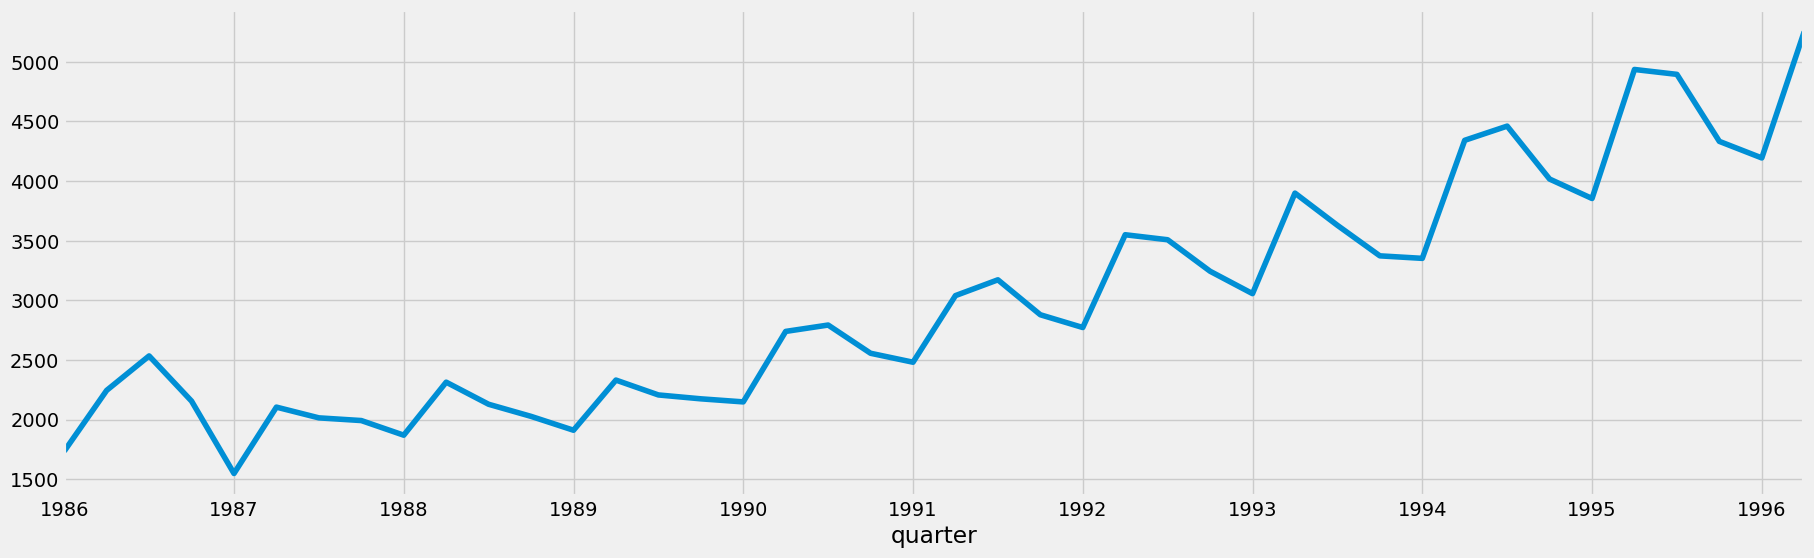

In [29]:
data1['Sales'].plot(figsize=(20, 6))
plt.show()

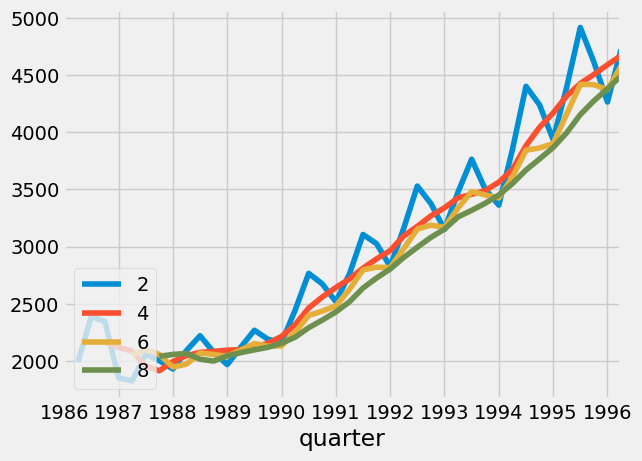

In [30]:
for i in range(2,10,2):
    data1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

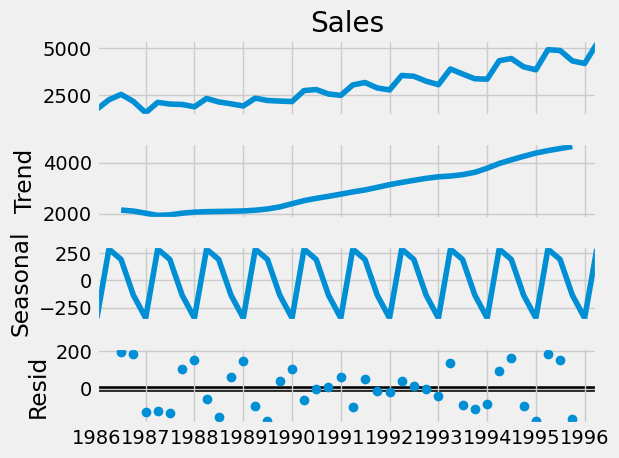

In [32]:
ts_add = seasonal_decompose(data1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

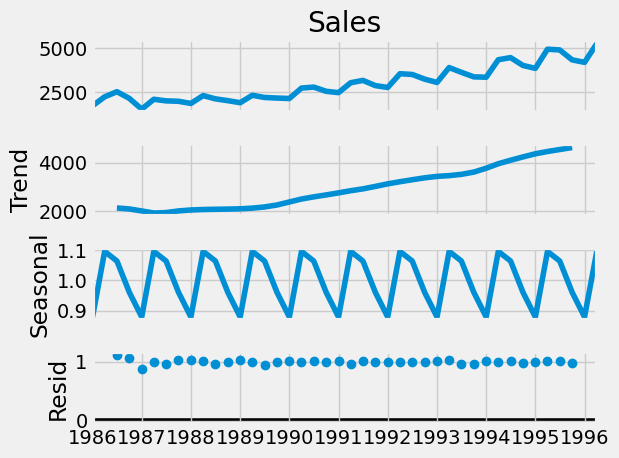

In [33]:
ts_mul = seasonal_decompose(data1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

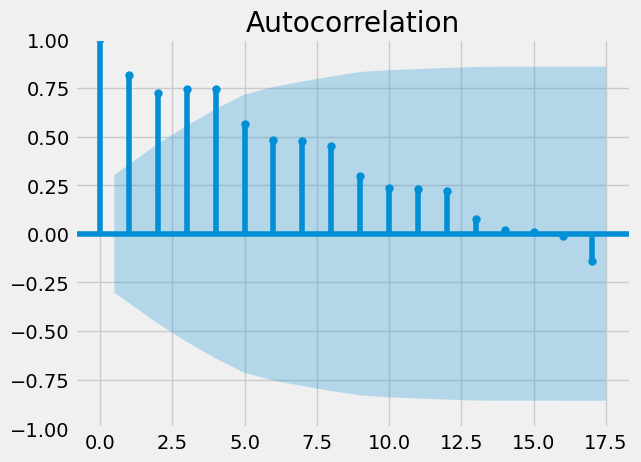

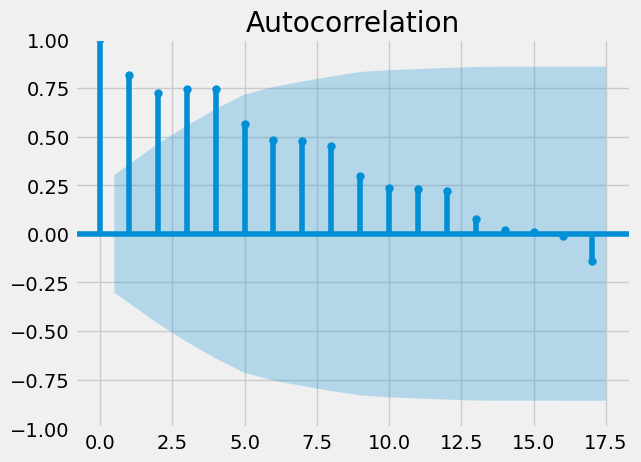

In [34]:
tsa_plots.plot_acf(data1.Sales)

# Time series forecasting with ARIMA

In [35]:
X = data1['Sales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

# Model

In [39]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(5,1,0))

In [41]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Sat, 02 Dec 2023   AIC                            360.163
Time:                        07:47:04   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

# This report summarises all the findings and the report

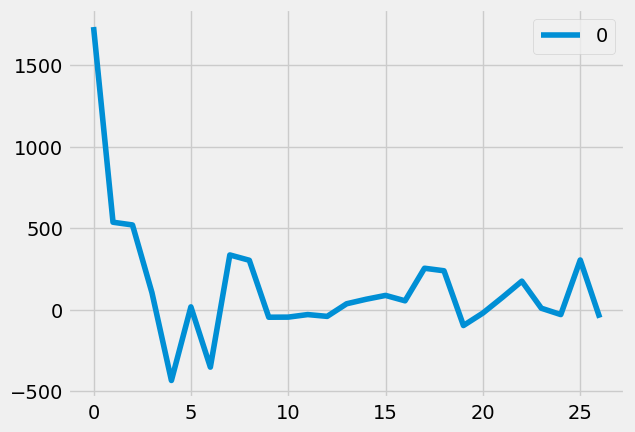

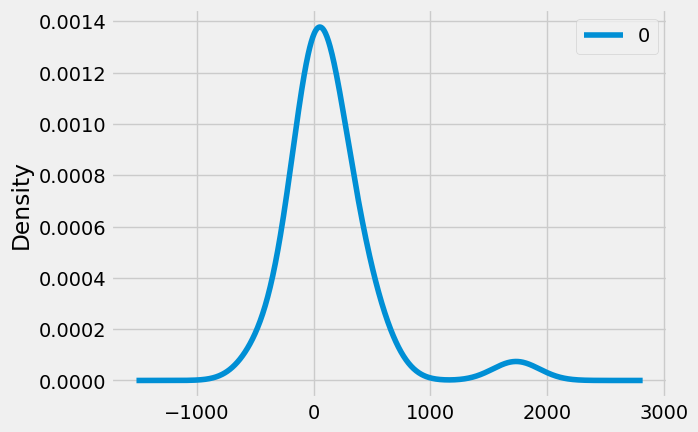

                 0
count    27.000000
mean    137.791854
std     385.970462
min    -433.659591
25%     -34.938856
50%      55.067398
75%     247.080157
max    1734.827000


In [43]:
from matplotlib import pyplot

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Rolling forecast ARIMA model

In [44]:
history = [x for x in train]

In [45]:
predictions = list()

In [48]:
for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)

print('predicted=%f, expected=%f' % (yhat, obs))

predicted=5177.006981, expected=5253.000000


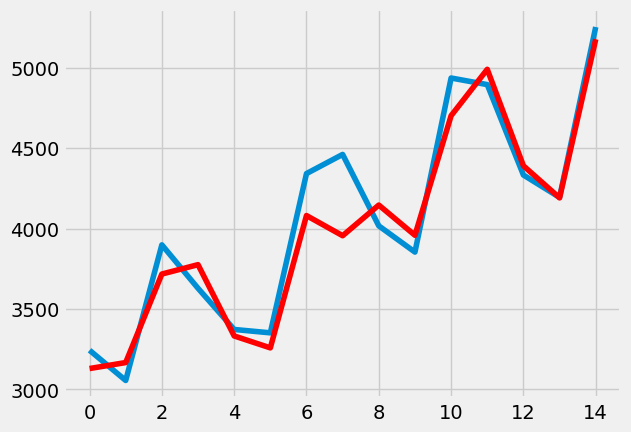

In [49]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# This plot shows the expected values (blue line) and predicted values (red line)

# Comparing Models

In [50]:
data2 = pd.get_dummies(data, columns = ['Quarter'])
data2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']
data2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
t= np.arange(1,43)
data2['t'] = t
data2['t_sq'] = data2['t']*data2['t']
log_Sales=np.log(data2['Sales'])
data2['log_Sales']=log_Sales
data2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


# Splitting data into train and test

In [52]:
train1, test1 = np.split(data2, [int(.67 *len(data2))])

# Model Building and evaluation using RMSE values

In [53]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
print("RMSE Linear Model: ",rmselin)

RMSE Linear Model:  580.1224130918635


In [54]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
print("RMSE Quadratic Model: ",rmsequad)

RMSE Quadratic Model:  783.7297975037553


In [55]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
print("RMSE Exponential Model: ",rmseexpo)

RMSE Exponential Model:  588.1405104900199


In [56]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
print("RMSE Additive Model: ",rmseadd)

RMSE Additive Model:  1869.7188209186954


In [57]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
print("RMSE Additive Linear Model:",rmseaddlinear)

RMSE Additive Linear Model: 596.1526282372298


In [58]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
print("RMSE Additive Quadratic Model:",rmseaddquad)

RMSE Additive Quadratic Model: 412.1144436053725


In [59]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
print("RMSE Multiplicative Model:",rmsemul)

RMSE Multiplicative Model: 2374.9194407954424


In [60]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
print("RMSE Multiplicative Linear Model:",rmsemulin)

RMSE Multiplicative Linear Model: 5359.6879119332325


In [61]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmsemulquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
print("RMSE Multiplicative Quadratic Model:",rmsemulquad)

RMSE Multiplicative Quadratic Model: 3630.56194673477


In [63]:
output = {'Model':pd.Series(['rmsemulquad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmsemulquad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [64]:
rmse=pd.DataFrame(output)

In [65]:
rmse

,Model,Values
0,rmsemulquad,3630.561947
1,rmseadd,1869.718821
2,rmseaddlinear,596.152628
3,rmseaddquad,412.114444
4,rmseexpo,588.140510
5,rmselin,580.122413
6,rmsemul,2374.919441
7,rmsemulin,5359.687912
8,rmsequad,783.729798


# **Additive seasonality with quadratic model has the best RMSE value**